# ANALYSE EXPLORATOIRE ET CLUSTURING  SUR LE  DATASET 'USED CARS' : DONFACK PASCAL : M1-GI

## Importation des librairies et chargement du dataset

In [182]:
# cd "C:\Users\donfa\OneDrive\Desktop\DEVOIR ML"

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('used_cars.csv')

df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [184]:
print(f"Le dataset contient {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Le dataset contient 4009 lignes et 12 colonnes.


## Nettoyage des données

In [185]:
# Suppression des espaces inutiles dans les noms de colonnes
df.columns = df.columns.str.strip()

# Conversion de la colonne 'price' en numérique
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)

# Vérification des valeurs manquantes
missing_values = df.isnull().sum()

missing_values

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [186]:
# Suppression des valeurs manquantes
df = df.dropna()

## Analyse exploratoire

In [187]:
# Description statistique des variables numériques
df.describe()

,model_year,price
count,3269.000000,3.269000e+03
mean,2014.601407,4.124113e+04
std,6.152181,8.304604e+04
min,1974.000000,2.000000e+03
25%,2011.000000,1.550000e+04
50%,2016.000000,2.800000e+04
75%,2019.000000,4.650000e+04
max,2024.000000,2.954083e+06


In [188]:
# Description des variables catégorielles
df.describe(include=['object'])

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
count,3269,3269,3269,3269,3269,3269,3269,3269,3269,3269
unique,52,1614,2194,7,963,32,120,74,2,1
top,Ford,M3 Base,"110,000 mi.",Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes
freq,341,29,16,2815,48,939,802,1680,2332,3269


#### La marque la plus fréquente est Ford

In [189]:
df['brand'].value_counts()

brand
Ford             341
BMW              316
Mercedes-Benz    268
Chevrolet        259
Toyota           171
Porsche          158
Audi             153
Lexus            136
Jeep             114
Land             100
Nissan            95
Cadillac          92
Dodge             84
GMC               84
RAM               72
Subaru            59
Hyundai           57
Mazda             57
INFINITI          54
Volkswagen        51
Honda             49
Kia               46
Acura             45
Lincoln           44
Jaguar            39
Volvo             33
MINI              31
Maserati          31
Bentley           27
Chrysler          25
Buick             25
Mitsubishi        20
Genesis           16
Hummer            16
Pontiac           15
Lamborghini       15
Alfa              12
Rolls-Royce       10
Ferrari            9
Aston              8
Scion              6
Saturn             5
McLaren            4
FIAT               4
Lotus              3
Mercury            3
Saab               2
Bugatti

#### Il y a 52 marques différentes dans le dataset.

### Visualisation des données

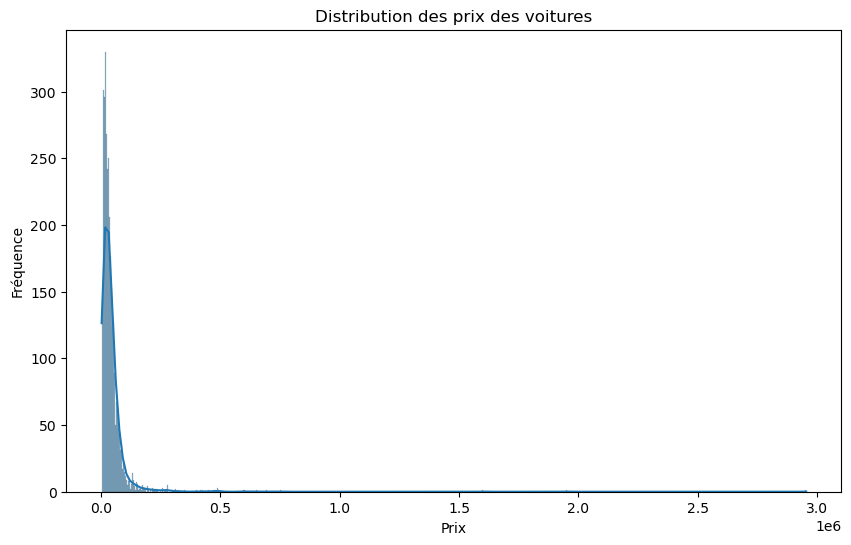

In [190]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution des prix des voitures')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()

#### La distribution des prix des voitures est asymétrique à droite. les voitures les moins chers sont les plus nombreuses

### quelques stats interessantes


In [191]:
most_expensive_car = df.loc[df['price'].idxmax()]
print("Voiture la plus chère :")
print(most_expensive_car[['brand', 'model', 'price']])

Voiture la plus chère :
brand             Maserati
model    Quattroporte Base
price            2954083.0
Name: 693, dtype: object


In [192]:
# Voiture la moins chère
cheapest_car = df.loc[df['price'].idxmin()]
print("\nVoiture la moins chère :")
print(cheapest_car[['brand', 'model', 'price']])


Voiture la moins chère :
brand           Lincoln
model    Aviator Luxury
price            2000.0
Name: 425, dtype: object


In [193]:
brand_counts = df['brand'].value_counts()
print("\nNombre de voitures par marque :")
print(brand_counts)


Nombre de voitures par marque :
brand
Ford             341
BMW              316
Mercedes-Benz    268
Chevrolet        259
Toyota           171
Porsche          158
Audi             153
Lexus            136
Jeep             114
Land             100
Nissan            95
Cadillac          92
Dodge             84
GMC               84
RAM               72
Subaru            59
Hyundai           57
Mazda             57
INFINITI          54
Volkswagen        51
Honda             49
Kia               46
Acura             45
Lincoln           44
Jaguar            39
Volvo             33
MINI              31
Maserati          31
Bentley           27
Chrysler          25
Buick             25
Mitsubishi        20
Genesis           16
Hummer            16
Pontiac           15
Lamborghini       15
Alfa              12
Rolls-Royce       10
Ferrari            9
Aston              8
Scion              6
Saturn             5
McLaren            4
FIAT               4
Lotus              3
Mercury         

In [194]:
average_price_by_brand = df.groupby('brand')['price'].mean().sort_values(ascending=False)
print("\nPrix moyen par marque :")
print(average_price_by_brand)


Prix moyen par marque :
brand
Bugatti          1.950995e+06
Rolls-Royce      3.863920e+05
Lamborghini      2.859089e+05
Ferrari          2.340876e+05
McLaren          2.322362e+05
Maserati         1.416163e+05
Aston            1.254932e+05
Bentley          1.228501e+05
Porsche          8.590918e+04
Maybach          6.425000e+04
Lotus            5.841667e+04
Mercedes-Benz    5.035782e+04
Land             4.987347e+04
RAM              4.157493e+04
Genesis          4.134606e+04
Cadillac         3.887376e+04
BMW              3.787408e+04
Chevrolet        3.627338e+04
Alfa             3.535750e+04
GMC              3.521315e+04
Audi             3.411637e+04
Ford             3.358521e+04
Lexus            3.284590e+04
Dodge            3.276021e+04
Jeep             2.911087e+04
Jaguar           2.894518e+04
Plymouth         2.850000e+04
Toyota           2.833211e+04
Nissan           2.649803e+04
Lincoln          2.592191e+04
Volvo            2.496885e+04
Kia              2.486587e+04
Acura    

In [195]:
accident_counts = df['accident'].value_counts()
print("\nNombre de voitures accidentées vs non accidentées :")
print(accident_counts)


Nombre de voitures accidentées vs non accidentées :
accident
None reported                             2332
At least 1 accident or damage reported     937
Name: count, dtype: int64


In [196]:
average_price_by_accident = df.groupby('accident')['price'].mean()
print("\nPrix moyen des voitures accidentées vs non accidentées :")
print(average_price_by_accident)


Prix moyen des voitures accidentées vs non accidentées :
accident
At least 1 accident or damage reported    28492.493063
None reported                             46363.540309
Name: price, dtype: float64


### Corrélation entre les variables numériques

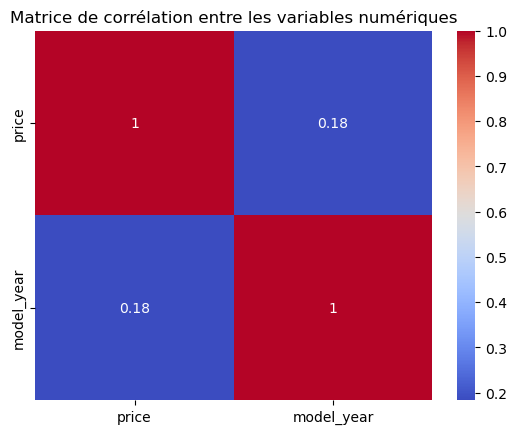

In [197]:
# Corrélation entre les variables numériques
correlation_matrix = df[['price','model_year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation entre les variables numériques')
plt.show()

Il y a qu'une tres faible correlation positive entre le prix et l'année de fabrication de la voiture

In [198]:
# Analyse des variables catégorielles
categorical_columns = ['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
df=df[['brand', 'model', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title','price','model_year']]
for col in categorical_columns:
    print(f"\nValeurs uniques pour {col}: {df[col].unique()}")


Valeurs uniques pour brand: ['Ford' 'Hyundai' 'INFINITI' 'Audi' 'BMW' 'Lexus' 'Aston' 'Toyota'
 'Lincoln' 'Land' 'Mercedes-Benz' 'Dodge' 'Nissan' 'Jaguar' 'Chevrolet'
 'Kia' 'Jeep' 'Bentley' 'MINI' 'Porsche' 'Hummer' 'Chrysler' 'Acura'
 'Volvo' 'Cadillac' 'Maserati' 'Genesis' 'Volkswagen' 'GMC' 'RAM' 'Subaru'
 'Alfa' 'Ferrari' 'Scion' 'Mitsubishi' 'Mazda' 'Saturn' 'Honda' 'Bugatti'
 'Lamborghini' 'Rolls-Royce' 'McLaren' 'Buick' 'Lotus' 'Pontiac' 'FIAT'
 'Saab' 'Mercury' 'Plymouth' 'smart' 'Maybach' 'Suzuki']

Valeurs uniques pour model: ['Utility Police Interceptor Base' 'Palisade SEL' 'Q50 Hybrid Sport' ...
 'CT 200h Base' 'Impala 2LZ' 'Continental GT Speed']

Valeurs uniques pour fuel_type: ['E85 Flex Fuel' 'Gasoline' 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']

Valeurs uniques pour transmission: ['6-Speed A/T' '8-Speed Automatic' '7-Speed A/T' 'A/T' '8-Speed A/T'
 'Transmission w/Dual Shift Mode' '9-Speed Automatic' '6-Speed M/T'
 'Automatic' '10-Speed A/T' '9-Speed A/

## CLUSTURING

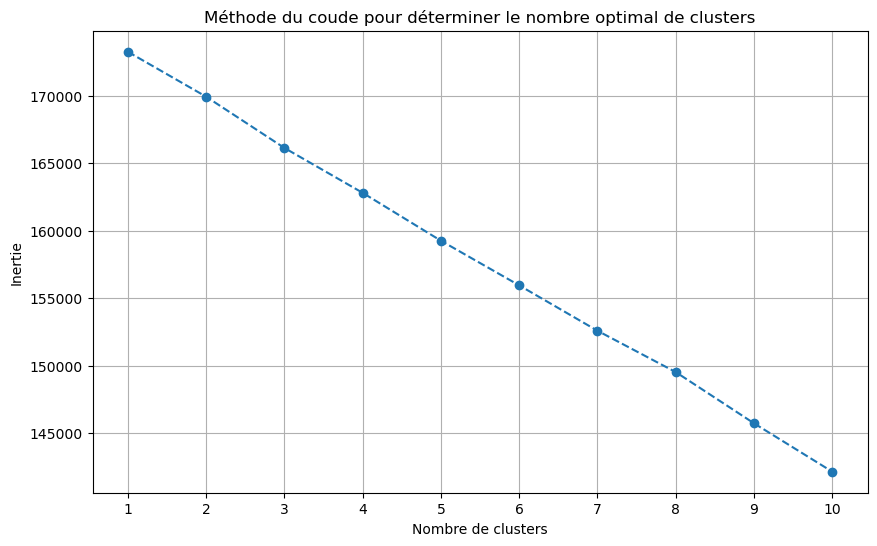

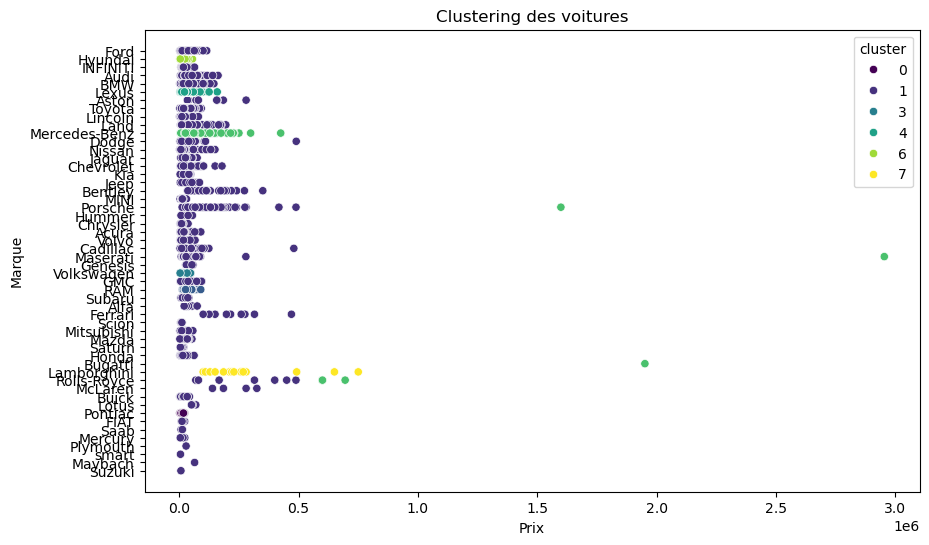

In [199]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Encodage des variables catégorielles avec get_dummies
df_encoded = pd.get_dummies(df, columns=['brand', 'accident'], drop_first=True)

# Sélection des caractéristiques pour le clustering
X_cluster = df_encoded[['price'] + list(df_encoded.filter(like='brand_')) + list(df_encoded.filter(like='model_'))]

# Standardisation des données
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Méthode du coude pour déterminer le nombre optimal de clusters
inertia = []
for k in range(1, 11):  # Test de 1 à 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster_scaled)
    inertia.append(kmeans.inertia_)  # Inertie pour chaque nombre de clusters

# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

optimal_k = 8  

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='brand', hue='cluster', data=df, palette='viridis')
plt.title('Clustering des voitures')
plt.xlabel('Prix')
plt.ylabel('Marque')
plt.show()

## PRETRAITEMENT DES DONNEES 

In [200]:
# Encodage des variables catégorielles avec get_dummies
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Conversion des booléens (True/False) en entiers (1/0)
df = df.astype(int)

df.head()

,price,model_year,cluster,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,...,int_col_Shara Beige,int_col_Silver,int_col_Sport,int_col_Tan,int_col_Titan Black / Quarzit,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_None reported
0,10300,2013,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38005,2021,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15500,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,31000,2017,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,7300,2001,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## REGRESSION LINEAIRE

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Sélection des caractéristiques et de la cible
X = df.drop('price', axis=1)
y = df['price']

# Standardisation des caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calcul de l'erreur en pourcentage (MAPE - Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_pred)

# Affichage des résultats
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')
print(f'MAPE: {mape:.2f}%')

MSE: 91375408111999405773542129715002736640.00
R2: -6239874089636566354316230656.00
MAPE: 28781226957210692.00%


### La regression linaire semble ne pas etre une bonne methode de prediction du prix pour ce dataset